In [1]:
from rejector.prediction import Prediction
from rejector.values import Values
from rejector.metric import Metric
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

## DistilBERT metric results

Trained on: Waseem and Hovy (2016)

Tested on: SemEval (2019)

INFO:root:Fraction of TPS: 0.21583333333333332
INFO:root:Fraction of TNS: 0.4266666666666667
INFO:root:Fraction of FPS: 0.15333333333333332
INFO:root:Fraction of FNS: 0.20416666666666666
c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.00873823]
INFO:root:KDE optimal bandwidths: [0.00591362]
INFO:root:KDE optimal bandwidths: [0.0102998]
INFO:root:KDE optimal bandwidths: [0.00925166]


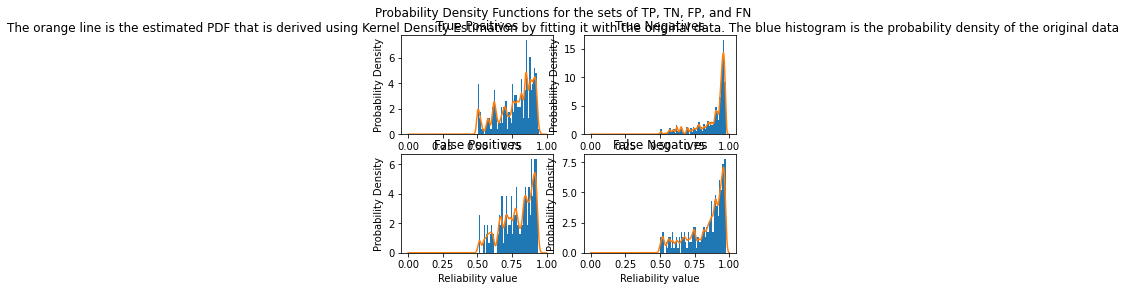

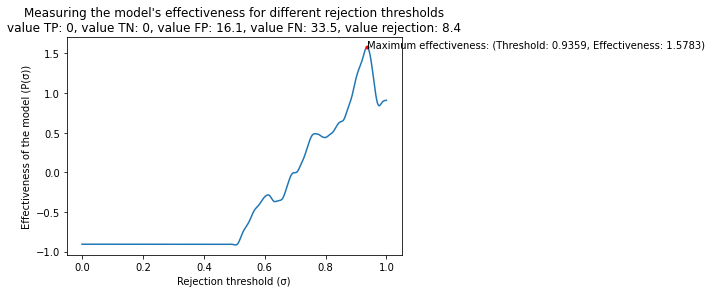

In [2]:
predictions = Prediction.load("input/distilbert-waseem-semeval.p", gold_class="Hate")
values = Values(value_TP=0, value_TN=0, value_FP=16.1, value_FN=33.5,value_rejection=8.4)
metric = Metric(values, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()

In [3]:
accepted = list(filter(lambda p: p.predicted_value >= 0.9359, predictions))
correct_accepted = list(filter(lambda p: p.predicted_class == p.actual_class, accepted))
rejected = list(filter(lambda p: p.predicted_value < 0.9359, predictions))
print("Num accepted: ", len(accepted))
print("Accuracy accepted: ", len(correct_accepted) / len(accepted))
print("Num rejected: ", len(rejected))

Num accepted:  309
Accuracy accepted:  0.7896440129449838
Num rejected:  891


## DistilBERT metric results

Trained on: Waseem and Hovy (2016)

Tested on: Waseem and Hovy (2016)

INFO:root:Fraction of TPS: 0.24114356743318832
INFO:root:Fraction of TNS: 0.6115599751398384
INFO:root:Fraction of FPS: 0.07458048477315103
INFO:root:Fraction of FNS: 0.07271597265382225
c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.00580851]
c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.00276388]
INFO:root:KDE optimal bandwidths: [0.02336458]
INFO:root:KDE optimal bandwidths: [0.01571403]


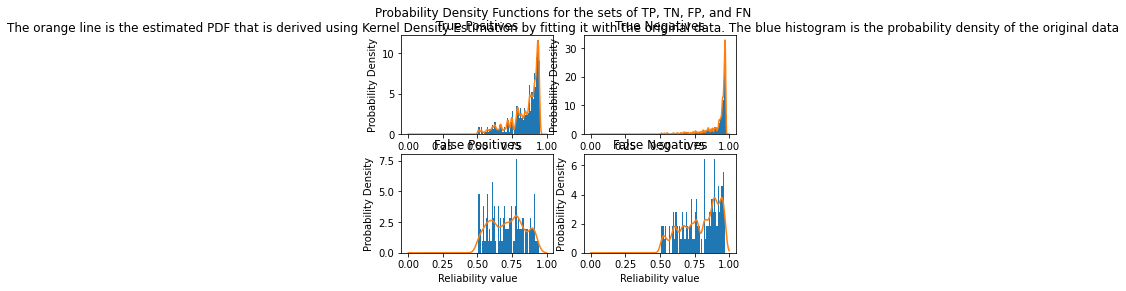

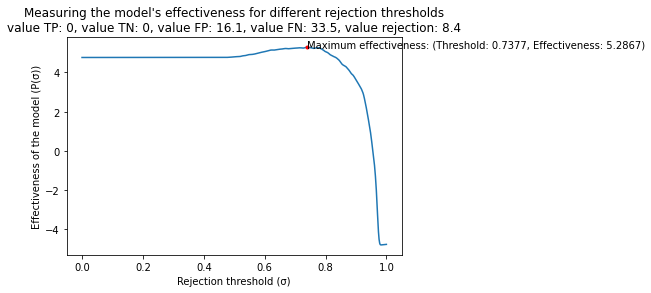

In [4]:
predictions = Prediction.load("input/distilbert-waseem-waseem.p", gold_class="Hate")
values = Values(value_TP=0, value_TN=0, value_FP=16.1, value_FN=33.5,value_rejection=8.4)
metric = Metric(values, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()

In [5]:
accepted = list(filter(lambda p: p.predicted_value >= 0.7377, predictions))
correct_accepted = list(filter(lambda p: p.predicted_class == p.actual_class, accepted))
rejected = list(filter(lambda p: p.predicted_value < 0.7377, predictions))
print("Num accepted: ", len(accepted))
print("Accuracy accepted: ", len(correct_accepted) / len(accepted))
print("Num rejected: ", len(rejected))

Num accepted:  1372
Accuracy accepted:  0.9052478134110787
Num rejected:  237
